In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import statistics as st
from numpy.linalg import norm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import make_scorer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

import math
from collections import Counter

import plotly.graph_objects as go
import networkx as nx
import webbrowser

In [2]:
def cosine_sim(v1, v2):
    v1 = int(v1)
    v2 = int(v2)
    if v1 == 0 and v2 == 0:
        return 1.0
    elif v1 == 0 or v2 == 0:
        return 0.0
    
    va1, va2 = [int(c) for c in str(v1)], [int(c) for c in str(v2)]
    while len(va1) < 4:
        va1.insert(0, 0)
    while len(va2) < 4:
        va2.insert(0, 0)
    
    A = np.array(va1)
    B = np.array(va2)
    
    return round(np.dot(A,B)/(norm(A)*norm(B)), 4)


def cosine_arrs(arr1, arr2):
    A = np.array(arr1)
    B = np.array(arr2)
    
    return round(np.dot(A,B)/(norm(A)*norm(B)), 4)


def inter(a):
    return int(a)


def digit_by_digit_subtraction(num1, num2):
    num1, num2 = abs(num1), abs(num2)
    # Convert the numbers to strings
    num1_str = str(num1)
    num2_str = str(num2)
    
    # Make sure both numbers have the same length
    max_len = max(len(num1_str), len(num2_str))
    num1_str = num1_str.zfill(max_len)
    num2_str = num2_str.zfill(max_len)
    
    result_str = ""
    
    for i in range(max_len):
        digit1 = int(num1_str[i])
        digit2 = int(num2_str[i])
        
        result_digit = digit1 - digit2
        
        result_str += str(result_digit)
    
    result = int("".join(result_str.split("-")))
    return result


def remove_zeros(a):
    a = abs(a)
    return sum([int(c) for c in str(a)])


def find_by_idx(dic, idx):
    counter = 0
    for i in list(dic.keys()):
        if counter <= idx:
            res = [i, dic[i]]
            counter += 1
        else:
            break
    return res


def sumless(a):
    res = 0
    while a > 0:
        res += a
        a -= 1
    return res


def count_nonzero_digits(num):
    num_str = str(num)
    count = sum(1 for digit in num_str if digit != '0')
    return count


def indices_of_nonzero_digits(num):
    num_str = str(num).zfill(4)  # Ensure at least 4 digits with leading zeros
    indices = [index for index, digit in enumerate(num_str) if digit != '0']
    return indices


def indices_of_nonzero_digits_x(num):
    num_str = str(num).zfill(4)  # Ensure at least 4 digits with leading zeros
    indices = []
    for index, digit in enumerate(num_str):
        if digit != '0':
            indices.extend([index] * int(digit))
    return indices


def cosine_distance_list(list1, list2):
    A = np.array(list1)
    B = np.array(list2)
    return 1.0 - (np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B)))


def compare_and_replace_numeric(list_of_strings):
    for i in range(24):
        # Get the set of characters at position i in all strings
        char_set = set(s[i] for s in list_of_strings)

        # If there is more than one unique character, replace with 'x'
        if len(char_set) > 1:
            for j in range(len(list_of_strings)):
                list_of_strings[j] = list_of_strings[j][:i] + 'x' + list_of_strings[j][i + 1:]
    return list_of_strings[0]


def add_zeros(a):
    temp = [c for c in str(a)]
    while len(temp) < 4:
        temp.insert(0, '0')
    return "".join(temp)


def compare_and_replace_with_options(input_list):
    result_list = []  # Create an empty list to store the modified strings
    
    for i in range(24):  # Assuming the length is always 24
        char_set = set(s[i] for s in input_list)
        if len(char_set) > 1:
            options = f"[{''.join(sorted(set(char_set)))}]"
            result_list.append(options)
        else:
            result_list.append(str(list(char_set)[0]))
    
    return "".join(result_list)


def compare_and_replace_with_options_freq(input_list):
    result_list = []  # Create an empty list to store the modified strings
    
    for i in range(24):  # Assuming the length is always 24
        char_set = [s[i] for s in input_list]
        if len(set(char_set)) > 1:
            options = f"[{''.join(sorted(char_set))}]"
            result_list.append(options)
        else:
            result_list.append(str(char_set[0]))
    
    return "".join(result_list)


def get_max(input_list):
    result_list = []  # Create an empty list to store the modified strings
#     res = []
    for i in range(24):  # Assuming the length is always 24
        temp = [int(s[i]) for s in input_list]
#         char_set = temp
#         temp.append([int(s[i]) for s in input_list])
        if len(set(temp)) <= 1:
            continue
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
#         res.append(char_set)
        rng = max(char_set) - min(char_set)
        if rng > 1:
            rng = 1
        div = len(set(char_set))
#         if len(set(char_set)) > 1:
        result_list.append(div*st.variance(char_set)*rng)
#             result_list.append(len(set(char_set))*st.variance(char_set)/len(char_set))
    
    return result_list
#     return res


def seperator(a):
    b_flag = False
    counter = 0
    temp = []
    for c in a:
        temp.append(c)
        if c == '[':
            b_flag = True
        elif c == ']':
            b_flag = False
            counter += 1
        else:
            if not b_flag:
                counter += 1
        if counter == 4:
            temp.append('-')
            counter = 0
    temp.pop()
    return "".join(temp)


def seperator_p(a):
    b_flag = False
    counter = 0
    temp = []
    for c in a:
        temp.append(c)
        if c == '(':
            b_flag = True
        elif c == ')':
            b_flag = False
            counter += 1
        else:
            if not b_flag:
                counter += 1
        if counter == 4:
            temp.append('-')
            counter = 0
    temp.pop()
    return "".join(temp)


def weight_cal(in_list):
    res = 0
    for i in in_list:
        if i == 0 or i == 1:
            res += -1
        elif i == 3 or i == 4:
            res += 1
    return ((res/len(in_list)) + 1)/2


def compare_and_replace_with_options_weight(input_list):
    result_list = []  # Create an empty list to store the modified strings

    for i in range(24):  # Assuming the length is always 24
#         print('(result, variability)')
        char_set = [int(s[i]) for s in input_list]
        unique = set(char_set)
        if len(unique) > 1:
            var_st = len(unique)*st.variance(char_set)/len(char_set)
            res = weight_cal(char_set)
            if res < 0.3333:
                res_d = 'l'
            elif res < 0.6666:
                res_d = 'm'
            else:
                res_d = 'h'
            if var_st <= 0.04419191919191919:
                var_d = 'vl'
            elif var_st <= 0.08304498269896193:
                var_d = 'l'
            elif var_st <= 0.14814814814814814:
                var_d = 'm'
            elif var_st <= 0.2740472910927456:
                var_d = 'h'
            else:
                var_d = 'vh'
#             options = '('+str(res)+', '+str(var_st)+')'
            options = '('+res_d+', '+var_d+')'
            result_list.append(options)
        else:
            result_list.append(str(char_set[0]))
    
    return "".join(result_list)


def compare_and_replace_with_options_weight_new(input_list):
    result_list = []  # Create an empty list to store the modified strings

    for i in range(24):  # Assuming the length is always 24
        temp = [int(s[i]) for s in input_list]
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
        unique = set(char_set)
        if len(unique) > 1:
            var_st = shannon_entropy(char_set)
            res = weight_cal(char_set)
            if res < 0.3333:
                res_d = 'l'
            elif res < 0.6666:
                res_d = 'm'
            else:
                res_d = 'h'
                
            if var_st <= 0.03314610342031348:
                var_d = 'vl'
            elif var_st <= 0.7219280948873623:
                var_d = 'l'
            elif var_st <= 0.9569960156058515:
                var_d = 'm'
            elif var_st <= 1.280743306515676:
                var_d = 'h'
            else:
                var_d = 'vh'
            options = '('+res_d+', '+var_d+')'
            result_list.append(options)
        else:
            result_list.append(str(temp[0]))
    
    return "".join(result_list)


def get_max(input_list):
    result_list = []  # Create an empty list to store the modified strings
#     res = []
    for i in range(24):  # Assuming the length is always 24
        temp = [int(s[i]) for s in input_list]
#         char_set = temp
#         temp.append([int(s[i]) for s in input_list])
        if len(set(temp)) <= 1:
            continue
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
#         res.append(char_set)
#         rng = max(char_set) - min(char_set)
#         if rng > 1:
#             rng = 1
#         div = len(set(char_set))
#         if len(set(char_set)) > 1:
#         result_list.append(div*st.variance(char_set)*rng)
        result_list.append(shannon_entropy(char_set))
#             result_list.append(len(set(char_set))*st.variance(char_set)/len(char_set))
    
    return result_list
#     return res


def shannon_entropy(values):
    n = len(values)
    
    # Count occurrences of each unique value in the list
    value_counts = Counter(values)
    
    # Calculate the probability of each unique value
    probabilities = [count / n for count in value_counts.values()]
    
    # Calculate Shannon entropy using the formula
    entropy = -sum(p * math.log2(p) for p in probabilities)
    
    return entropy


def count_most_and_least_frequent_items(lst):
    if not lst:
        return 0, 0  # Handle empty list

    counter = Counter(lst)
    most_frequent_count = max(counter.values())
    least_frequent_count = min(counter.values())

    return most_frequent_count, least_frequent_count


def compare_and_replace_with_options_blah(input_list):
    result_list = []  # Create an empty list to store the modified strings

    for i in range(24):   
        temp = [int(s[i]) for s in input_list]
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
        unique = set(char_set)
        if len(unique) > 1:
#             var_st = shannon_entropy(char_set)
            res = weight_cal(char_set)
            target = 0
            sm = 0
            if res < 0.3333:
                res_d = 'l'
                target = 1
            elif res < 0.6666:
                res_d = 'm'
                target = 2
            else:
                res_d = 'h'
                target = 3

            for i in char_set:
                if i == target:
                    sm += 1
#             if var_st <= 0.03314610342031348:
#                 var_d = 'vl'
#             elif var_st <= 0.7219280948873623:
#                 var_d = 'l'
#             elif var_st <= 0.9569960156058515:
#                 var_d = 'm'
#             elif var_st <= 1.280743306515676:
#                 var_d = 'h'
#             else:
#                 var_d = 'vh'
            options = '('+res_d+', '+str(round(sm/len(char_set) * 100, 2))+')'
            result_list.append(options)
        else:
            result_list.append(str(temp[0]))
    
    return "".join(result_list)


def cl_rep(a):
    b_flag = False
    counter = 0
    temp = []
    for c in a:
        if c == '(':
            b_flag = True
        elif c == ')':
            b_flag = False
            counter += 1
        else:
            if not b_flag:
                counter += 1
                if c == '0' or c == '1':
                    temp.append('1')
                elif c == '2':
                    temp.append('2')
                elif c == '3' or c == '4':
                    temp.append('3')
            else:
                if c == 'l':
                    temp.append('1')
                elif c == 'm':
                    temp.append('2')
                elif c == 'h':
                    temp.append('3')
        if counter == 4:
            temp.append('-')
            counter = 0
    temp.pop()
    return "".join(temp)

In [3]:
df = pd.read_csv('Zvectors_final.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,5,4,3,2,1,inducing
0,1333,2113,1221,2333,2,4444
1,1333,1221,1223,444,1221,4002
2,3002,1333,2112,1221,2113,3002
3,3112,3002,3112,3003,3112,3112
4,4002,1333,3112,1221,2223,3112
...,...,...,...,...,...,...
4199,2222,2222,3222,1332,4222,3222
4200,4442,442,4110,3443,444,4442
4201,2331,1333,4331,3221,3000,1001
4202,2331,1333,4331,3221,3000,1111


In [4]:
states = []
for i in tqdm(range(len(df))):
    temp = df.iloc[i]
    res1 = []
    fi = [c for c in str(temp['5'])]
    while len(fi) < 4:
        fi.insert(0, '0')
    fo = [c for c in str(temp['4'])]
    while len(fo) < 4:
        fo.insert(0, '0')
    th = [c for c in str(temp['3'])]
    while len(th) < 4:
        th.insert(0, '0')
    tw = [c for c in str(temp['2'])]
    while len(tw) < 4:
        tw.insert(0, '0')
    on = [c for c in str(temp['1'])]
    while len(on) < 4:
        on.insert(0, '0')
    nd = [c for c in str(temp['inducing'])]
    while len(nd) < 4:
        nd.insert(0, '0')
    res1.extend(fi)
    res1.extend(fo)
    res1.extend(th)
    res1.extend(tw)
    res1.extend(on)
    res1.extend(nd)
    states.append(list(map(inter, res1)))

100%|██████████| 4204/4204 [00:00<00:00, 6042.85it/s]


In [5]:
state_array = np.array(states)

distances = pdist(state_array, cosine_distance_list)

In [6]:
threshold = 0.155750625

In [7]:
state_names = list(range(1, 4205))

# Initialize lists to store captured text and image outputs
captured_outputs = []

# Initialize a dictionary to map cluster numbers to lists of states
cluster_to_states = {}

method = 'average'

ress = []

# for method in [, 'complete', 'average', 'ward']:  # Try different linkage methods
linkage_matrix = linkage(distances, method=method)

cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')
num_clusters = len(set(cluster_labels))

# Capture the text output
captured_output = f"Threshold: {threshold}, Number of clusters: {num_clusters}\n"

# Initialize a dictionary to map cluster numbers to lists of states
cluster_states = {cluster_num: [] for cluster_num in range(1, num_clusters + 1)}

for i, cluster_num in enumerate(cluster_labels):
    cluster_states[cluster_num].append(state_names[i])

max_cluster_size = 0
max_cluster_num = 0

for cluster_num, states in cluster_states.items():
    if len(states) > max_cluster_size:
        max_cluster_size = len(states)
        max_cluster_num = cluster_num

captured_output += f"Cluster with max elements: {max_cluster_size}, Cluster Sizes:\n"

for cluster_num, states in cluster_states.items():
    captured_output += f"Cluster {cluster_num} has {len(states)} elements: {states}\n"
    ress.append(states)

# Append the captured output to the list
captured_outputs.append(captured_output)

# Print a separator
captured_outputs.append("*****************************************************************************")

# Print the captured outputs for the current method
for output in captured_outputs:
    print(output)

# Save the captured text outputs to a text file
# with open("h_cluster/output_average_final.txt", "w") as f:
#     f.writelines(captured_outputs)

Threshold: 0.155750625, Number of clusters: 324
Cluster with max elements: 121, Cluster Sizes:
Cluster 1 has 2 elements: [242, 360]
Cluster 2 has 1 elements: [256]
Cluster 3 has 1 elements: [3901]
Cluster 4 has 1 elements: [1968]
Cluster 5 has 10 elements: [1186, 1187, 1189, 1190, 1216, 3618, 3619, 3621, 3632, 4086]
Cluster 6 has 9 elements: [1526, 1527, 1534, 1559, 3898, 3899, 3955, 3956, 3957]
Cluster 7 has 6 elements: [1529, 1532, 1663, 4151, 4152, 4153]
Cluster 8 has 3 elements: [258, 1052, 3484]
Cluster 9 has 2 elements: [232, 1998]
Cluster 10 has 2 elements: [3069, 3070]
Cluster 11 has 2 elements: [492, 2584]
Cluster 12 has 8 elements: [20, 509, 1510, 2416, 2417, 2627, 3551, 3885]
Cluster 13 has 2 elements: [433, 2473]
Cluster 14 has 6 elements: [491, 493, 1178, 2582, 2583, 2585]
Cluster 15 has 3 elements: [1084, 3510, 4083]
Cluster 16 has 8 elements: [153, 1642, 4104, 4105, 4106, 4112, 4113, 4114]
Cluster 17 has 1 elements: [23]
Cluster 18 has 4 elements: [464, 465, 2537, 2538]


In [8]:
clusters = []
for ls in ress:
    temp = []
    for i in ls:
        temp.append("".join(list(map(add_zeros, list(df.iloc[i-1])))))
    clusters.append(temp)
clusters

[['111204404440211240020000', '000004404440211240023002'],
 ['000014434440400202210442'],
 ['111011104331200100000220'],
 ['100021104220211021100004'],
 ['110200024002000110012002',
  '100202224002000110022002',
  '200200033002000110022112',
  '110200024002000200022002',
  '100202233112000100012002',
  '110200024003000110012001',
  '100202224003000110022001',
  '200200023112000110022112',
  '100212223112000100012002',
  '100302233113200320013003'],
 ['100200024332100211120112',
  '100210023222100200020112',
  '100200022112200210020112',
  '100200023222100200020112',
  '100200024332100212220122',
  '100200024332100211120122',
  '111100014221100300010111',
  '111100014221100400010111',
  '100200024222100310020112'],
 ['100200023002100220020112',
  '100200023002000231120112',
  '100211123112100210020002',
  '100410024112000210020002',
  '100410124112000210020002',
  '100410014112000200020002'],
 ['400021120221011240040000',
  '400201120212022330020002',
  '400201110222022230020002'],
 ['1

In [9]:
res_new = []
for cl in clusters:
    if len(cl) < 2:
        continue
    res_new.append(compare_and_replace_with_options_blah(cl))
res_new

['111(l, 50.0)0440444021124002(m, 0.0)00(l, 50.0)',
 '(l, 80.0)10(m, 90.0)0(l, 50.0)(l, 50.0)(m, 70.0)400(m, 70.0)(l, 90.0)00(l, 80.0)(l, 90.0)00(l, 50.0)(m, 90.0)00(m, 70.0)',
 '100(m, 77.78)000(m, 77.78)(h, 88.89)(m, 55.56)(m, 55.56)(m, 77.78)(l, 88.89)00(h, 33.33)1(l, 88.89)(l, 88.89)(m, 77.78)01(l, 77.78)(m, 77.78)',
 '100(h, 50.0)000(m, 83.33)30021002(l, 66.67)0020112',
 '400(m, 66.67)(l, 66.67)11(m, 66.67)02(m, 66.67)(m, 66.67)0(m, 66.67)(m, 66.67)(h, 33.33)400(h, 33.33)000(m, 66.67)',
 '(m, 0.0)004044100040000(m, 0.0)(l, 50.0)(l, 50.0)3(l, 50.0)441',
 '3001(l, 50.0)4413001300130014440',
 '011244310001000321121330',
 '(m, 75.0)00(h, 37.5)(m, 0.0)(h, 87.5)(h, 87.5)(l, 75.0)(l, 62.5)(l, 75.0)0(h, 62.5)(h, 75.0)11(h, 37.5)(m, 37.5)00(m, 50.0)0(h, 75.0)(h, 75.0)1',
 '(h, 50.0)11(l, 50.0)03300440(l, 50.0)00(l, 50.0)300(l, 50.0)0333',
 '(l, 50.0)112433(m, 0.0)(l, 83.33)33(l, 50.0)000(l, 83.33)(m, 16.67)00(h, 50.0)1(h, 83.33)(h, 83.33)0',
 '0(h, 66.67)(h, 66.67)1(m, 0.0)001200(m, 66.67)

In [10]:
res_f_new = []
for r in res_new:
    res_f_new.append(cl_rep(r))
    
res_f_new

['1111-1331-3331-2112-3112-2111',
 '1112-1112-3112-1111-1111-2112',
 '1112-1112-3222-1113-1112-1112',
 '1113-1112-3112-1112-1112-1112',
 '3112-1112-1222-1223-3113-1112',
 '2113-1331-1113-1111-2113-1331',
 '3111-1331-3111-3111-3111-3331',
 '1112-3331-1111-1113-2112-1331',
 '2113-2331-1113-3113-2112-1331',
 '3111-1331-1331-1111-3111-1333',
 '1112-3332-1331-1111-2113-1331',
 '1331-2111-2112-2112-3333-3112',
 '3331-2112-2111-1112-3332-1111',
 '1111-1111-1113-1113-1113-3113',
 '1111-1322-1112-3112-1223-3112',
 '1112-1112-1111-3112-1332-2112',
 '1112-1111-1111-3332-1112-2112',
 '1112-1112-1222-1122-1212-2112',
 '1111-1113-1332-3332-2223-3111',
 '1332-1111-1333-3321-2111-1333',
 '1331-1111-3223-3113-3223-1333',
 '1111-1113-2223-1333-3221-1332',
 '1113-2112-1331-3112-3112-1331',
 '3113-3111-1333-1332-1111-1332',
 '2112-3111-1331-1333-3112-1333',
 '3112-3112-1332-2221-2112-1332',
 '1333-3112-1331-3332-3112-3333',
 '1111-2111-2331-3332-3113-1333',
 '1113-2332-1111-2111-1111-3333',
 '1112-2111-33

In [11]:
vecs = []
for i in res_f_new:
    vecs.append(list(map(inter, i.split('-'))))
vecs

[[1111, 1331, 3331, 2112, 3112, 2111],
 [1112, 1112, 3112, 1111, 1111, 2112],
 [1112, 1112, 3222, 1113, 1112, 1112],
 [1113, 1112, 3112, 1112, 1112, 1112],
 [3112, 1112, 1222, 1223, 3113, 1112],
 [2113, 1331, 1113, 1111, 2113, 1331],
 [3111, 1331, 3111, 3111, 3111, 3331],
 [1112, 3331, 1111, 1113, 2112, 1331],
 [2113, 2331, 1113, 3113, 2112, 1331],
 [3111, 1331, 1331, 1111, 3111, 1333],
 [1112, 3332, 1331, 1111, 2113, 1331],
 [1331, 2111, 2112, 2112, 3333, 3112],
 [3331, 2112, 2111, 1112, 3332, 1111],
 [1111, 1111, 1113, 1113, 1113, 3113],
 [1111, 1322, 1112, 3112, 1223, 3112],
 [1112, 1112, 1111, 3112, 1332, 2112],
 [1112, 1111, 1111, 3332, 1112, 2112],
 [1112, 1112, 1222, 1122, 1212, 2112],
 [1111, 1113, 1332, 3332, 2223, 3111],
 [1332, 1111, 1333, 3321, 2111, 1333],
 [1331, 1111, 3223, 3113, 3223, 1333],
 [1111, 1113, 2223, 1333, 3221, 1332],
 [1113, 2112, 1331, 3112, 3112, 1331],
 [3113, 3111, 1333, 1332, 1111, 1332],
 [2112, 3111, 1331, 1333, 3112, 1333],
 [3112, 3112, 1332, 2221,

In [12]:
with open("edges.pickle", 'rb') as f:
    edges = pickle.load(f)

In [13]:
res_f_new

['1111-1331-3331-2112-3112-2111',
 '1112-1112-3112-1111-1111-2112',
 '1112-1112-3222-1113-1112-1112',
 '1113-1112-3112-1112-1112-1112',
 '3112-1112-1222-1223-3113-1112',
 '2113-1331-1113-1111-2113-1331',
 '3111-1331-3111-3111-3111-3331',
 '1112-3331-1111-1113-2112-1331',
 '2113-2331-1113-3113-2112-1331',
 '3111-1331-1331-1111-3111-1333',
 '1112-3332-1331-1111-2113-1331',
 '1331-2111-2112-2112-3333-3112',
 '3331-2112-2111-1112-3332-1111',
 '1111-1111-1113-1113-1113-3113',
 '1111-1322-1112-3112-1223-3112',
 '1112-1112-1111-3112-1332-2112',
 '1112-1111-1111-3332-1112-2112',
 '1112-1112-1222-1122-1212-2112',
 '1111-1113-1332-3332-2223-3111',
 '1332-1111-1333-3321-2111-1333',
 '1331-1111-3223-3113-3223-1333',
 '1111-1113-2223-1333-3221-1332',
 '1113-2112-1331-3112-3112-1331',
 '3113-3111-1333-1332-1111-1332',
 '2112-3111-1331-1333-3112-1333',
 '3112-3112-1332-2221-2112-1332',
 '1333-3112-1331-3332-3112-3333',
 '1111-2111-2331-3332-3113-1333',
 '1113-2332-1111-2111-1111-3333',
 '1112-2111-33

In [14]:
edges

{'3112-2111': 0.56,
 '1111-2112': 0.19,
 '1112-1112': 0.73,
 '3113-1112': 0.95,
 '2113-1331': 0.26,
 '3111-3331': 0.28,
 '2112-1331': 0.16,
 '3111-1333': 0.93,
 '3333-3112': 0.49,
 '3332-1111': 0.72,
 '1113-3113': 0.72,
 '1223-3112': 0.69,
 '1332-2112': 0.41,
 '1112-2112': 0.84,
 '1212-2112': 0.77,
 '2223-3111': 0.35,
 '2111-1333': 0.54,
 '3223-1333': 0.37,
 '3221-1332': 0.75,
 '3112-1331': 0.72,
 '1111-1332': 0.83,
 '3112-1333': 0.33,
 '2112-1332': 0.13,
 '3112-3333': 0.29,
 '3113-1333': 0.51,
 '1111-3333': 0.77,
 '1112-3333': 0.14,
 '2112-3333': 0.87,
 '3111-3333': 0.54,
 '1112-2323': 0.37,
 '1223-3233': 0.53,
 '2111-3333': 0.25,
 '1111-3221': 0.9,
 '2112-3231': 0.19,
 '2111-1111': 0.9,
 '1112-2122': 0.21,
 '3113-3113': 0.88,
 '1112-2232': 0.34,
 '2112-3221': 0.38,
 '1112-1332': 0.48,
 '1113-1332': 0.28,
 '1113-1222': 0.35,
 '3111-2111': 0.33,
 '3112-1221': 0.34,
 '1113-3223': 0.7,
 '1112-1221': 0.1,
 '1111-1222': 0.18,
 '3112-3112': 0.41,
 '3111-3111': 0.49,
 '2112-2222': 0.43,
 '33

In [17]:
edges['1111-1331-3331-2112-3112-2111']

0.33

In [18]:
edges['1331-3331-2112-3112-2111']

0.33

In [19]:
edges['3331-2112-3112-2111']

0.72

In [20]:
edges['2112-3112-2111']

0.22

In [21]:
edges['3112-2111']

0.56

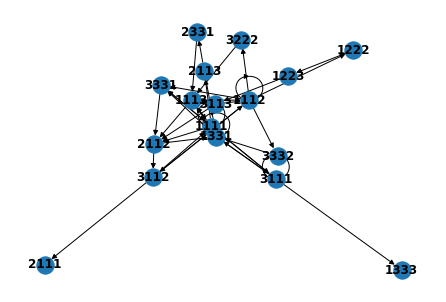

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# List of paths
paths = [
    '1111-1331-3331-2112-3112-2111',
    '1112-1112-3112-1111-1111-2112',
    '1112-1112-3222-1113-1112-1112',
    '1113-1112-3112-1112-1112-1112',
    '3112-1112-1222-1223-3113-1112',
    '2113-1331-1113-1111-2113-1331',
    '3111-1331-3111-3111-3111-3331',
    '1112-3331-1111-1113-2112-1331',
    '2113-2331-1113-3113-2112-1331',
    '3111-1331-1331-1111-3111-1333',
    '1112-3332-1331-1111-2113-1331'
]

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes and edges based on paths
for path in paths:
    nodes = path.split('-')
    for i in range(len(nodes) - 1):
        G.add_edge(nodes[i], nodes[i+1])

# Draw the graph
nx.draw(G, with_labels=True, font_weight='bold')

# Show the plot
plt.show()


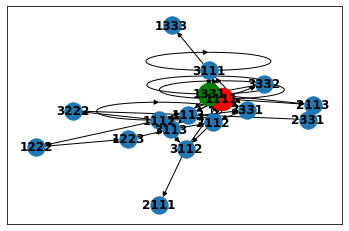

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# List of paths
paths = [
    '1111-1331-3331-2112-3112-2111',
    '1112-1112-3112-1111-1111-2112',
    '1112-1112-3222-1113-1112-1112',
    '1113-1112-3112-1112-1112-1112',
    '3112-1112-1222-1223-3113-1112',
    '2113-1331-1113-1111-2113-1331',
    '3111-1331-3111-3111-3111-3331',
    '1112-3331-1111-1113-2112-1331',
    '2113-2331-1113-3113-2112-1331',
    '3111-1331-1331-1111-3111-1333',
    '1112-3332-1331-1111-2113-1331'
]

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes and edges based on paths
for path in paths:
    nodes = path.split('-')
    for i in range(len(nodes) - 1):
        G.add_edge(nodes[i], nodes[i+1])

# Draw the graph
pos = nx.spring_layout(G)  # Layout the graph
nx.draw_networkx(G, pos, with_labels=True, font_weight='bold')

# Highlight start and end nodes
start_node = paths[0].split('-')[0]
end_node = paths[-1].split('-')[-1]
nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='r', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='g', node_size=500)

# Show the plot
plt.show()


In [24]:
# List of paths
raw_paths = [
    '1111-1331-3331-2112-3112-2111',
    '1112-1112-3112-1111-1111-2112',
    '1112-1112-3222-1113-1112-1112',
    '1113-1112-3112-1112-1112-1112',
    '3112-1112-1222-1223-3113-1112',
    '2113-1331-1113-1111-2113-1331',
    '3111-1331-3111-3111-3111-3331',
    '1112-3331-1111-1113-2112-1331',
    '2113-2331-1113-3113-2112-1331',
    '3111-1331-1331-1111-3111-1333',
    '1112-3332-1331-1111-2113-1331'
]

paths = []

for path in raw_paths:
    n = []
    temp = path.split('-')
    for count, t in enumerate(temp):
        n.append(t+'_'+str(count))
    paths.append("-".join(n))
    
paths

['1111_0-1331_1-3331_2-2112_3-3112_4-2111_5',
 '1112_0-1112_1-3112_2-1111_3-1111_4-2112_5',
 '1112_0-1112_1-3222_2-1113_3-1112_4-1112_5',
 '1113_0-1112_1-3112_2-1112_3-1112_4-1112_5',
 '3112_0-1112_1-1222_2-1223_3-3113_4-1112_5',
 '2113_0-1331_1-1113_2-1111_3-2113_4-1331_5',
 '3111_0-1331_1-3111_2-3111_3-3111_4-3331_5',
 '1112_0-3331_1-1111_2-1113_3-2112_4-1331_5',
 '2113_0-2331_1-1113_2-3113_3-2112_4-1331_5',
 '3111_0-1331_1-1331_2-1111_3-3111_4-1333_5',
 '1112_0-3332_1-1331_2-1111_3-2113_4-1331_5']

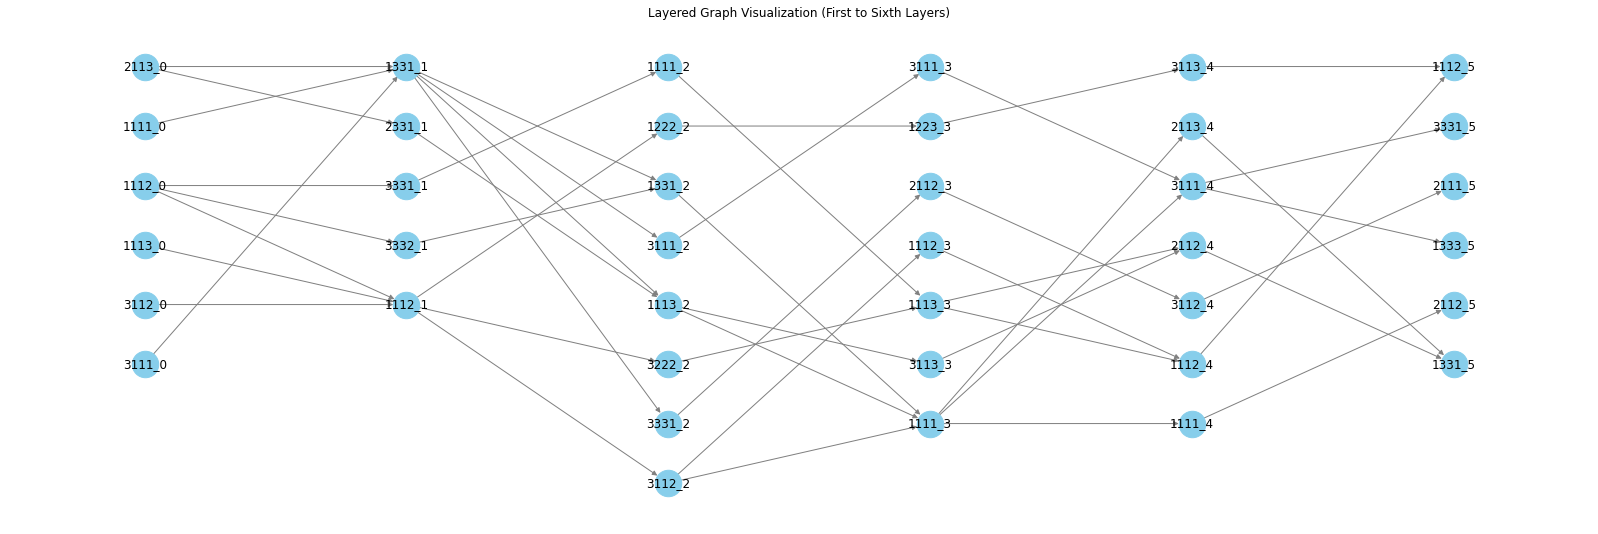

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# List of paths
raw_paths = [
    '1111-1331-3331-2112-3112-2111',
    '1112-1112-3112-1111-1111-2112',
    '1112-1112-3222-1113-1112-1112',
    '1113-1112-3112-1112-1112-1112',
    '3112-1112-1222-1223-3113-1112',
    '2113-1331-1113-1111-2113-1331',
    '3111-1331-3111-3111-3111-3331',
    '1112-3331-1111-1113-2112-1331',
    '2113-2331-1113-3113-2112-1331',
    '3111-1331-1331-1111-3111-1333',
    '1112-3332-1331-1111-2113-1331'
]

paths = []

# Convert raw paths to the desired format
for path in raw_paths:
    nodes = path.split('-')
    formatted_path = "-".join([f"{node}_{i}" for i, node in enumerate(nodes)])
    paths.append(formatted_path)

# Create an empty directed graph
G = nx.DiGraph()

# Extract unique nodes for each layer from the paths
first_layer_nodes = set()
second_layer_nodes = set()
third_layer_nodes = set()
fourth_layer_nodes = set()
fifth_layer_nodes = set()
sixth_layer_nodes = set()
for path in paths:
    nodes = path.split('-')
    first_layer_nodes.add(nodes[0])
    second_layer_nodes.add(nodes[1])
    third_layer_nodes.add(nodes[2])
    fourth_layer_nodes.add(nodes[3])
    fifth_layer_nodes.add(nodes[4])
    sixth_layer_nodes.add(nodes[5])

# Add nodes for the first layer
for node in first_layer_nodes:
    G.add_node(node)

# Add nodes for the second layer
for node in second_layer_nodes:
    G.add_node(node)

# Add nodes for the third layer
for node in third_layer_nodes:
    G.add_node(node)

# Add nodes for the fourth layer
for node in fourth_layer_nodes:
    G.add_node(node)

# Add nodes for the fifth layer
for node in fifth_layer_nodes:
    G.add_node(node)

# Add nodes for the sixth layer
for node in sixth_layer_nodes:
    G.add_node(node)

# Add edges from the first layer to the second layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[0], nodes[1])

# Add edges from the second layer to the third layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[1], nodes[2])

# Add edges from the third layer to the fourth layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[2], nodes[3])

# Add edges from the fourth layer to the fifth layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[3], nodes[4])

# Add edges from the fifth layer to the sixth layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[4], nodes[5])

# Determine the horizontal positions of nodes with decreased distance
pos = {}
horizontal_distance = 0.005  # Adjust this value to decrease or increase the horizontal distance between layers
for i, node in enumerate(first_layer_nodes):
    pos[node] = (0, -i)  # First layer nodes on the left
for i, node in enumerate(second_layer_nodes):
    pos[node] = (1 * horizontal_distance, -i)  # Second layer nodes next to the first layer
for i, node in enumerate(third_layer_nodes):
    pos[node] = (2 * horizontal_distance, -i)  # Third layer nodes next to the second layer
for i, node in enumerate(fourth_layer_nodes):
    pos[node] = (3 * horizontal_distance, -i)  # Fourth layer nodes next to the third layer
for i, node in enumerate(fifth_layer_nodes):
    pos[node] = (4 * horizontal_distance, -i)  # Fifth layer nodes next to the fourth layer
for i, node in enumerate(sixth_layer_nodes):
    pos[node] = (5 * horizontal_distance, -i)  # Sixth layer nodes next to the fifth layer

# Draw the graph
plt.figure(figsize=(22, 7))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', edge_color='gray', arrows=True)

plt.title("Layered Graph Visualization (First to Sixth Layers)")
plt.show()


In [40]:
import plotly.graph_objects as go
import networkx as nx
import webbrowser

# List of paths
raw_paths = [
    '1111-1331-3331-2112-3112-2111',
    '1112-1112-3112-1111-1111-2112',
    '1112-1112-3222-1113-1112-1112',
    '1113-1112-3112-1112-1112-1112',
    '3112-1112-1222-1223-3113-1112',
    '2113-1331-1113-1111-2113-1331',
    '3111-1331-3111-3111-3111-3331',
    '1112-3331-1111-1113-2112-1331',
    '2113-2331-1113-3113-2112-1331',
    '3111-1331-1331-1111-3111-1333',
    '1112-3332-1331-1111-2113-1331'
]

paths = []

# Convert raw paths to the desired format
for path in raw_paths:
    nodes = path.split('-')
    formatted_path = "-".join([f"{node}_{i}" for i, node in enumerate(nodes)])
    paths.append(formatted_path)

# Create an empty directed graph
G = nx.DiGraph()

# Extract unique nodes for each layer from the paths
first_layer_nodes = set()
second_layer_nodes = set()
third_layer_nodes = set()
fourth_layer_nodes = set()
fifth_layer_nodes = set()
sixth_layer_nodes = set()
for path in paths:
    nodes = path.split('-')
    first_layer_nodes.add(nodes[0])
    second_layer_nodes.add(nodes[1])
    third_layer_nodes.add(nodes[2])
    fourth_layer_nodes.add(nodes[3])
    fifth_layer_nodes.add(nodes[4])
    sixth_layer_nodes.add(nodes[5])

# Add nodes for the first layer
for node in first_layer_nodes:
    G.add_node(node)

# Add nodes for the second layer
for node in second_layer_nodes:
    G.add_node(node)

# Add nodes for the third layer
for node in third_layer_nodes:
    G.add_node(node)

# Add nodes for the fourth layer
for node in fourth_layer_nodes:
    G.add_node(node)

# Add nodes for the fifth layer
for node in fifth_layer_nodes:
    G.add_node(node)

# Add nodes for the sixth layer
for node in sixth_layer_nodes:
    G.add_node(node)

# Add edges from the first layer to the second layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[0], nodes[1])

# Add edges from the second layer to the third layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[1], nodes[2])

# Add edges from the third layer to the fourth layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[2], nodes[3])

# Add edges from the fourth layer to the fifth layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[3], nodes[4])

# Add edges from the fifth layer to the sixth layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[4], nodes[5])

# Determine the horizontal positions of nodes with decreased distance
pos = {}
horizontal_distance = 1  # Adjust this value to decrease or increase the horizontal distance between layers
for i, node in enumerate(first_layer_nodes):
    pos[node] = (0, -i)  # First layer nodes on the left
for i, node in enumerate(second_layer_nodes):
    pos[node] = (1 * horizontal_distance, -i)  # Second layer nodes next to the first layer
for i, node in enumerate(third_layer_nodes):
    pos[node] = (2 * horizontal_distance, -i)  # Third layer nodes next to the second layer
for i, node in enumerate(fourth_layer_nodes):
    pos[node] = (3 * horizontal_distance, -i)  # Fourth layer nodes next to the third layer
for i, node in enumerate(fifth_layer_nodes):
    pos[node] = (4 * horizontal_distance, -i)  # Fifth layer nodes next to the fourth layer
for i, node in enumerate(sixth_layer_nodes):
    pos[node] = (5 * horizontal_distance, -i)  # Sixth layer nodes next to the fifth layer

# Draw the graph using Plotly
fig = go.Figure()

for edge in G.edges():
    fig.add_trace(go.Scatter(x=[pos[edge[0]][0], pos[edge[1]][0]], y=[pos[edge[0]][1], pos[edge[1]][1]],
                             mode='lines', line=dict(color='gray', width=1),
                             hoverinfo='none'))

for node in G.nodes():
    fig.add_trace(go.Scatter(x=[pos[node][0]], y=[pos[node][1]], mode='markers',
                             marker=dict(size=10, color='skyblue'),
                             text=node, hoverinfo='text'))

fig.update_layout(title="Layered Graph Visualization (First to Sixth Layers)",
                  xaxis=dict(visible=False),
                  yaxis=dict(visible=False),
                  showlegend=False)

# Open the graph in a new tab for interactive visualization
html_path = "layered_graph.html"
fig.write_html(html_path)
webbrowser.open(html_path, new=2)


True

In [15]:
# List of paths
raw_paths = res_f_new

paths = []

# Convert raw paths to the desired format
for path in raw_paths:
    nodes = path.split('-')
    formatted_path = "-".join([f"{node}_{i}" for i, node in enumerate(nodes)])
    paths.append(formatted_path)

# Create an empty directed graph
G = nx.DiGraph()

# Extract unique nodes for each layer from the paths
first_layer_nodes = set()
second_layer_nodes = set()
third_layer_nodes = set()
fourth_layer_nodes = set()
fifth_layer_nodes = set()
sixth_layer_nodes = set()
for path in paths:
    nodes = path.split('-')
    first_layer_nodes.add(nodes[0])
    second_layer_nodes.add(nodes[1])
    third_layer_nodes.add(nodes[2])
    fourth_layer_nodes.add(nodes[3])
    fifth_layer_nodes.add(nodes[4])
    sixth_layer_nodes.add(nodes[5])

# Add nodes for the first layer
for node in first_layer_nodes:
    G.add_node(node)

# Add nodes for the second layer
for node in second_layer_nodes:
    G.add_node(node)

# Add nodes for the third layer
for node in third_layer_nodes:
    G.add_node(node)

# Add nodes for the fourth layer
for node in fourth_layer_nodes:
    G.add_node(node)

# Add nodes for the fifth layer
for node in fifth_layer_nodes:
    G.add_node(node)

# Add nodes for the sixth layer
for node in sixth_layer_nodes:
    G.add_node(node)

# Add edges from the first layer to the second layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[0], nodes[1])

# Add edges from the second layer to the third layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[1], nodes[2])

# Add edges from the third layer to the fourth layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[2], nodes[3])

# Add edges from the fourth layer to the fifth layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[3], nodes[4])

# Add edges from the fifth layer to the sixth layer
for path in paths:
    nodes = path.split('-')
    G.add_edge(nodes[4], nodes[5])

# Determine the horizontal positions of nodes with decreased distance
pos = {}
horizontal_distance = 0.0000002  # Adjust this value to decrease or increase the horizontal distance between layers
for i, node in enumerate(first_layer_nodes):
    pos[node] = (0, -i)  # First layer nodes on the left
for i, node in enumerate(second_layer_nodes):
    pos[node] = (1 * horizontal_distance, -i)  # Second layer nodes next to the first layer
for i, node in enumerate(third_layer_nodes):
    pos[node] = (2 * horizontal_distance, -i)  # Third layer nodes next to the second layer
for i, node in enumerate(fourth_layer_nodes):
    pos[node] = (3 * horizontal_distance, -i)  # Fourth layer nodes next to the third layer
for i, node in enumerate(fifth_layer_nodes):
    pos[node] = (4 * horizontal_distance, -i)  # Fifth layer nodes next to the fourth layer
for i, node in enumerate(sixth_layer_nodes):
    pos[node] = (5 * horizontal_distance, -i)  # Sixth layer nodes next to the fifth layer

In [16]:
e = []
edge_values = {}
for edge in list(edges.keys()):
    temp = edge.split('-')
    n = []
    for i in range(0, 2):
        n.append(temp[i]+'_'+str(i+6-len(temp)))
    if n not in e:
        e.append(n)
    edge_values[(n[0], n[1])] = edges[edge]

In [17]:
for edge, value in edge_values.items():
    G[edge[0]][edge[1]]['value'] = value

In [44]:
# Draw the graph using Plotly
fig = go.Figure()

for edge in G.edges():
    fig.add_trace(go.Scatter(x=[pos[edge[0]][0], pos[edge[1]][0]], y=[pos[edge[0]][1], pos[edge[1]][1]],
                             mode='lines', line=dict(color='gray', width=1),
                             hoverinfo='none'))

for node in G.nodes():
    fig.add_trace(go.Scatter(x=[pos[node][0]], y=[pos[node][1]], mode='markers',
                             marker=dict(size=10, color='skyblue'),
                             text=node, hoverinfo='text'))

fig.update_layout(title="Layered Graph Visualization (First to Sixth Layers)",
                  xaxis=dict(visible=False),
                  yaxis=dict(visible=False),
                  showlegend=False)

# Open the graph in a new tab for interactive visualization
html_path = "layered_graph.html"
fig.write_html(html_path)
webbrowser.open(html_path, new=2)


True

In [31]:
import networkx as nx
import numpy as np

def dijkstra_most_likely_path(G, source, target):
    # Initialize distances with negative infinity
    dist = {node: -np.inf for node in G.nodes()}
    dist[source] = 0
    
    # Initialize predecessors
    pred = {}
    
    # Priority queue to store nodes to be visited
    queue = [(dist[node], node) for node in G.nodes()]
    
    while queue:
        _, u = max(queue)  # Choose the node with the highest probability
        
        if u == target:
            break
        
        queue.remove((dist[u], u))
        
        for v in G.neighbors(u):
            if dist[u] * G[u][v]['value'] > dist[v]:
                dist[v] = dist[u] * G[u][v]['value']
                pred[v] = u
                queue.append((dist[v], v))
    
    # Reconstruct path
    path = []
    node = target
    while node in pred:
        path.insert(0, node)
        node = pred[node]
    path.insert(0, source)
    
    # Calculate the probability of the path
    prob = 1
    for i in range(len(path)-1):
        prob *= G[path[i]][path[i+1]]['value']
    
    return path, prob

# Example usage
source = '1111_0'  # Start node
target = '2111_5'  # End node

most_likely_path, probability = dijkstra_most_likely_path(G, source, target)
print("Most likely path:", most_likely_path)
print("Probability:", probability)


Most likely path: ['1111_0', '3223_1', '3112_2', '3333_3', '3222_4', '2111_5']
Probability: 0.13780799999999999


In [32]:
a = [1, 2, 3, 4, 5]
a.pop(0)
a

[2, 3, 4, 5]

In [27]:
probs = {k: 0 for k in res_f_new}
for k in list(probs.keys()):
    temp = k.split('-')
    prob = 1
    while len(temp) > 1:
        prob *= edges["-".join(temp)]
        temp.pop(0)
    probs[k] = prob
probs

{'1111-1331-3331-2112-3112-2111': 0.009659865600000003,
 '1112-1112-3112-1111-1111-2112': 0.01974423,
 '1112-1112-3222-1113-1112-1112': 0.23382892799999996,
 '1113-1112-3112-1112-1112-1112': 0.48399000000000003,
 '3112-1112-1222-1223-3113-1112': 0.0684,
 '2113-1331-1113-1111-2113-1331': 0.011232,
 '3111-1331-3111-3111-3111-3331': 0.005721408000000001,
 '1112-3331-1111-1113-2112-1331': 0.05634720000000001,
 '2113-2331-1113-3113-2112-1331': 0.0019302400000000004,
 '3111-1331-1331-1111-3111-1333': 0.20474880000000004,
 '1112-3332-1331-1111-2113-1331': 0.009701120000000002,
 '1331-2111-2112-2112-3333-3112': 0.074088,
 '3331-2112-2111-1112-3332-1111': 0.17291520000000002,
 '1111-1111-1113-1113-1113-3113': 0.10904371199999999,
 '1111-1322-1112-3112-1223-3112': 0.035328000000000005,
 '1112-1112-1111-3112-1332-2112': 0.05535000000000001,
 '1112-1111-1111-3332-1112-2112': 0.021455279999999997,
 '1112-1112-1222-1122-1212-2112': 0.08807309279999999,
 '1111-1113-1332-3332-2223-3111': 0.00266000000

In [34]:
edges['1113-1112-3112-1112-1112-1112']

1.0

In [35]:
edges['1112-3112-1112-1112-1112']

1.0

In [36]:
edges['3112-1112-1112-1112']

0.85

In [37]:
edges['1112-1112-1112']

0.78

In [38]:
edges['1112-1112']

0.73

In [39]:
dict(sorted(probs.items(), key=lambda item: item[1], reverse=True))

{'3112-2111-3333-3331-2111-1111': 0.8190000000000001,
 '3331-1322-2222-1222-1333-2332': 0.585488,
 '1112-3333-2111-3221-3222-1111': 0.581702016,
 '1113-1112-3112-1112-1112-1112': 0.48399000000000003,
 '2113-3331-1111-1112-3113-1112': 0.4654999999999999,
 '1331-1112-3112-1331-3112-3223': 0.46399999999999997,
 '1331-1213-3111-1333-1133-2112': 0.45810335999999996,
 '1111-1112-3112-1111-1333-1111': 0.42900000000000005,
 '1113-1111-3331-1112-2112-3333': 0.42737184,
 '3111-1112-1111-2112-3333-1113': 0.39232855,
 '3111-3111-3111-1112-3111-3111': 0.38142090000000006,
 '1333-1333-1111-2112-3333-1332': 0.3540420000000001,
 '3111-1111-1211-2221-1112-1112': 0.34339200000000003,
 '1111-1223-1111-3112-3111-1333': 0.31205592,
 '1333-1331-3332-1113-1111-2331': 0.30552,
 '3222-2222-3112-2111-1332-1331': 0.30132648,
 '1332-3331-1112-1333-1111-3332': 0.2937,
 '2113-3333-3221-3223-1112-1112': 0.278568,
 '3111-2111-1332-3332-2331-1221': 0.27144480000000004,
 '1223-1133-2333-3112-3111-1333': 0.2659800000000

In [26]:
len(probs)

303

In [34]:
with open("probs.pickle", 'wb') as f:
    pickle.dump(probs, f)